<p style="text-align:center">
    <a href="https://www.kaggle.com/competitions/spaceship-titanic/overview" target="_blank">
    <img src="https://www.kaggle.com/static/images/site-logo.svg" width="200" alt="Skills Network Logo"  />
    </a>
</p>


### Spaceship Titanic

Welcome to the year 2912, We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



<div>
<img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" width="500"/>
</div>

To help rescue crews and retrieve the lost passengers, we are going to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

### Loading Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
ss_df = pd.read_csv('data/sample_submission.csv')

In [3]:
print("train_dataset shape =",train_df.shape, "\ntest_dataset shape =",test_df.shape)

train_dataset shape = (8693, 14) 
test_dataset shape = (4277, 13)


In [4]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [5]:
train_df.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [6]:
train_df.duplicated().sum()

0

In [7]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = train_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
train_df["total_cost"]=train_df['RoomService']+train_df['FoodCourt']+train_df['ShoppingMall']+train_df['Spa']+train_df['VRDeck']

In [9]:
test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = test_df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
test_df["total_cost"]=test_df['RoomService']+test_df['FoodCourt']+test_df['ShoppingMall']+test_df['Spa']+test_df['VRDeck']

### Visualizing relation b/w trasported and various other categories

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid", color_codes=True)

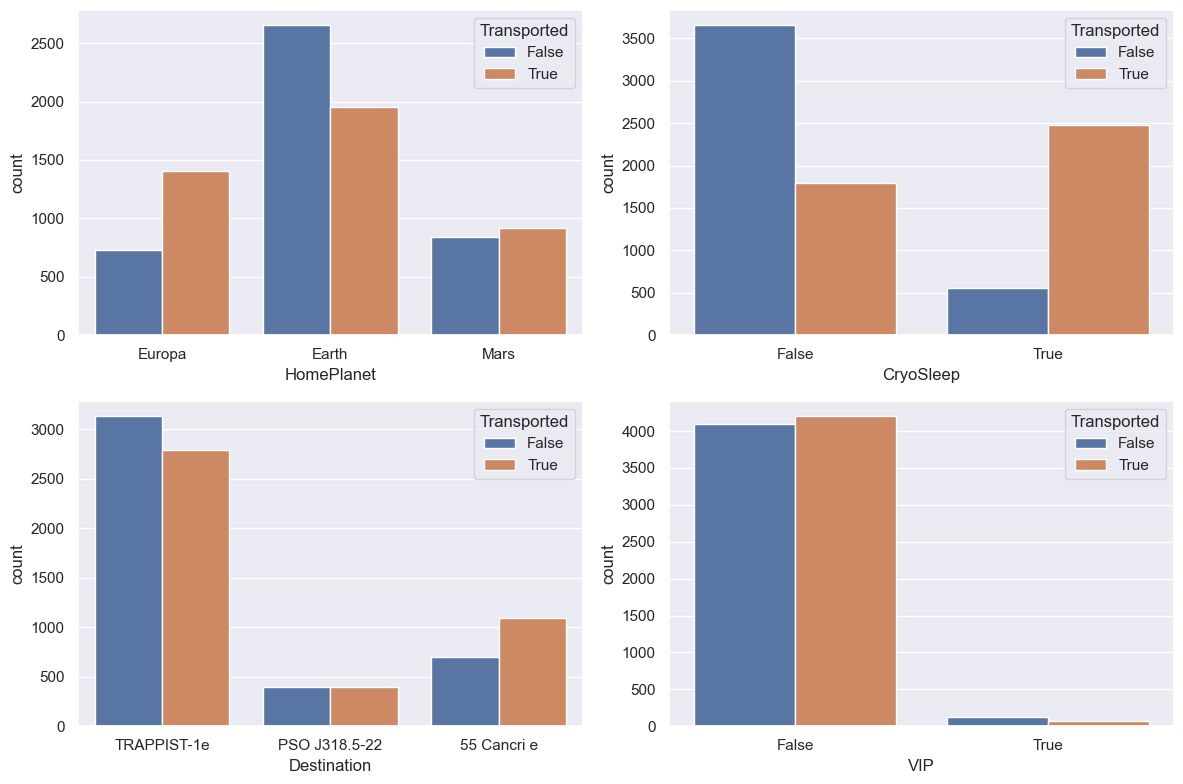

In [11]:
countplot_cols = ["HomePlanet","CryoSleep","Destination","VIP"]
fig, axes =  plt.subplots(nrows=2, ncols=2, figsize=(12,8))
axes = axes.flatten()
for i, col in enumerate(countplot_cols):
    sns.countplot(x=col,hue="Transported", data=train_df, ax=axes[i])
    
fig.tight_layout()
plt.show()

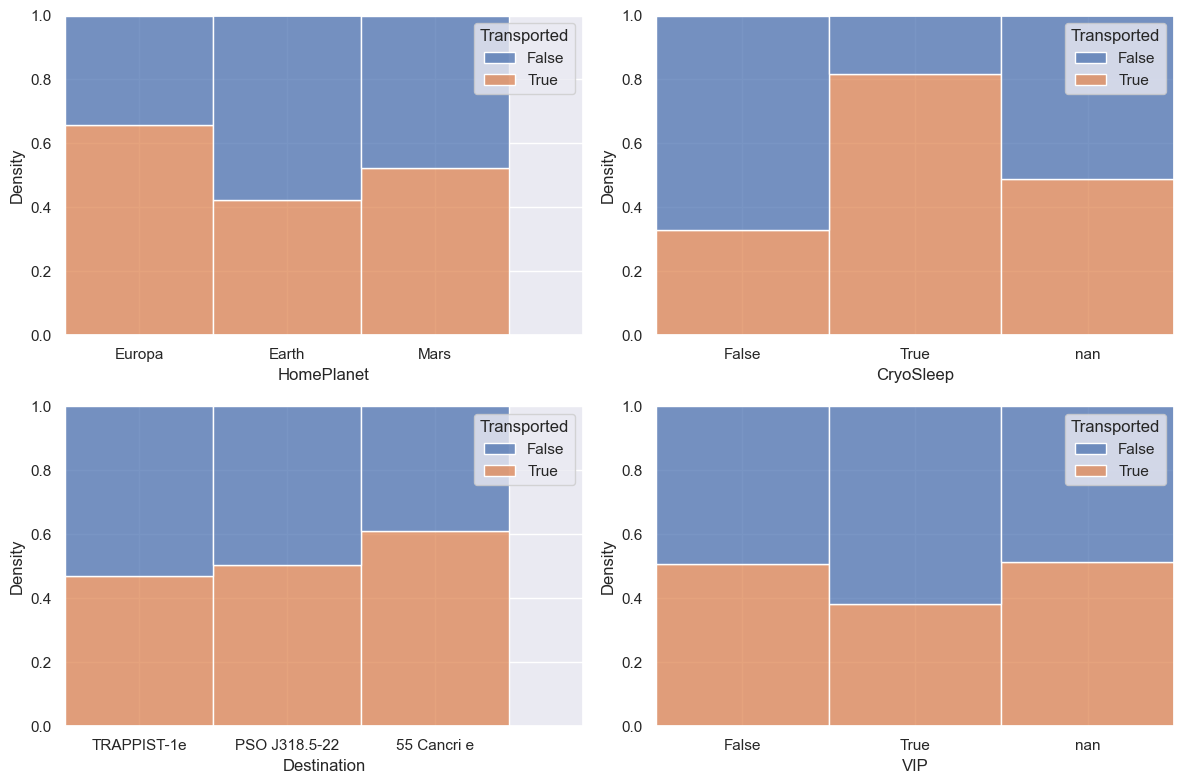

In [12]:
countplot_cols = ["HomePlanet","CryoSleep","Destination","VIP"]
fig, axes =  plt.subplots(nrows=2, ncols=2, figsize=(12,8))
train_df['CryoSleep'] = train_df['CryoSleep'].astype(str)
train_df['VIP'] = train_df['VIP'].astype(str)
axes = axes.flatten()
for i, col in enumerate(countplot_cols):
    sns.histplot(x=col,hue="Transported", data=train_df, ax=axes[i], multiple="fill", stat="density")
    xticks=range(len(train_df[col].unique()))
    axes[i].set_xticks(xticks)
    
fig.tight_layout()
plt.show()

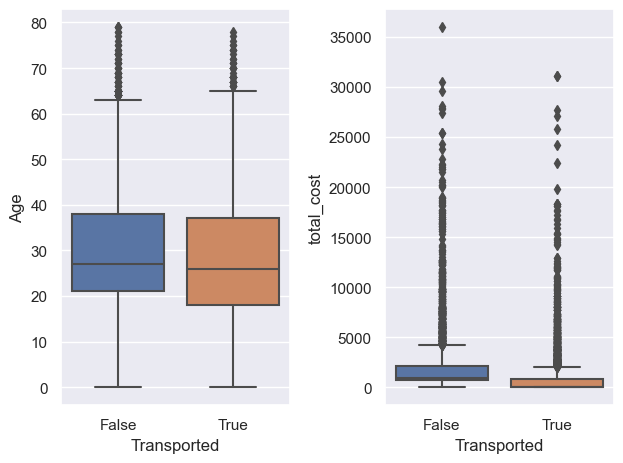

In [13]:
fig2,axes2 = plt.subplots(nrows=1,ncols=2)
axes2 = axes2.flatten()

box_cols = ["Age","total_cost"]
for i, col in enumerate(box_cols):
    sns.boxplot(y=col, x="Transported", data=train_df, ax=axes2[i])
    
    
fig2.tight_layout()
plt.show()

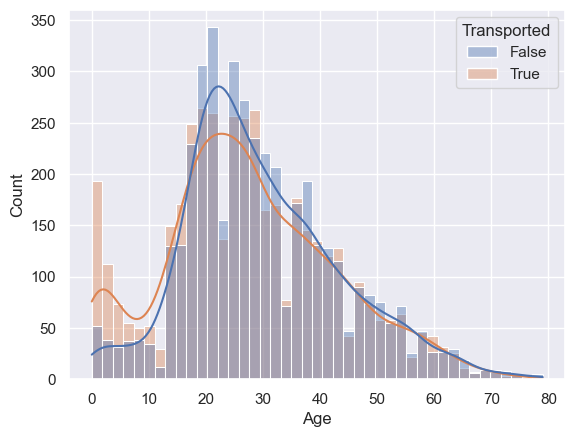

In [14]:
sns.histplot(x="Age", hue="Transported", data=train_df, alpha=0.4, kde=True)
plt.show()

In [15]:
#Splitting Cabin Data
train_df["Cabin"].fillna("Z/9999/Z", inplace=True)
train_df["Cabin_deck"] = train_df["Cabin"].apply(lambda x: x.split("/")[0])
train_df["Cabin_number"] = train_df["Cabin"].apply(lambda x: x.split("/")[1]).astype(int)
train_df["Cabin_side"] = train_df["Cabin"].apply(lambda x: x.split("/")[2])

In [16]:
#Splitting Cabin Data
test_df["Cabin"].fillna("Z/9999/Z", inplace=True)
test_df["Cabin_deck"] = test_df["Cabin"].apply(lambda x: x.split("/")[0])
test_df["Cabin_number"] = test_df["Cabin"].apply(lambda x: x.split("/")[1]).astype(int)
test_df["Cabin_side"] = test_df["Cabin"].apply(lambda x: x.split("/")[2])

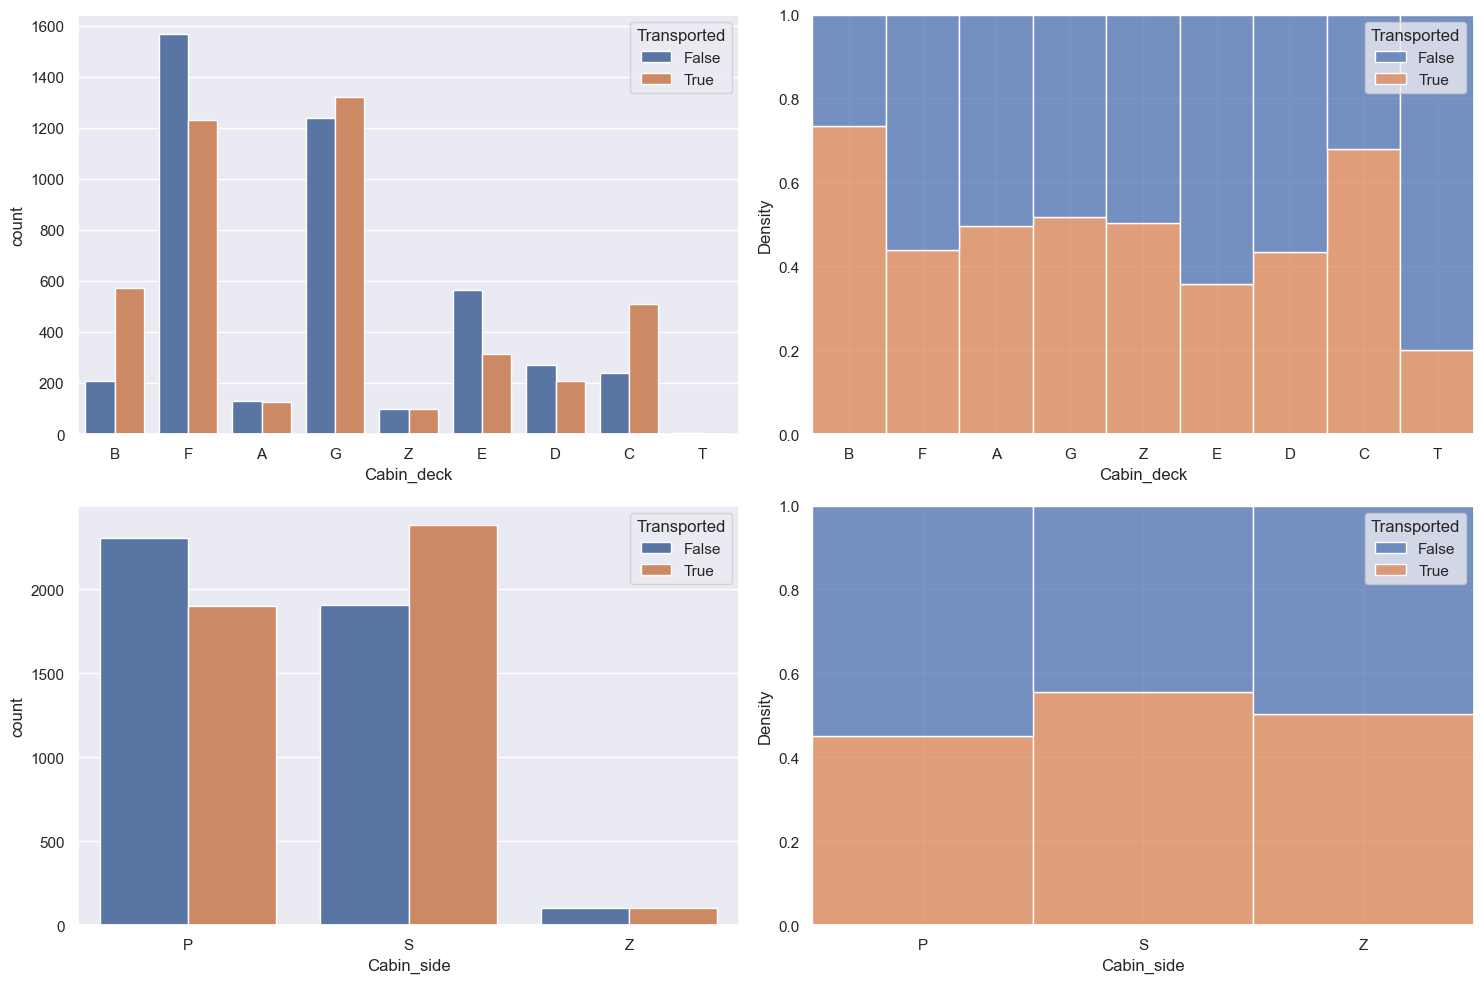

In [17]:
fig3, axes3 = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
# axes3 = axes3.flatten()
cabin_cols = ["Cabin_deck","Cabin_side"]
for i in range(2):
    sns.countplot(x=cabin_cols[i],hue="Transported", data=train_df, ax=axes3[i,0])
    
    sns.histplot(x=cabin_cols[i],hue="Transported", data=train_df, ax=axes3[i,1], multiple="fill", stat="density")
    xticks=range(len(train_df[cabin_cols[i]].unique()))
    axes3[i,1].set_xticks(xticks)
    
fig3.tight_layout()
plt.show()


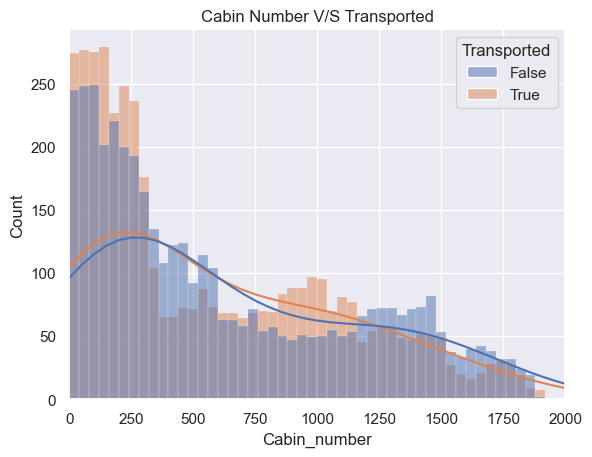

In [18]:
sns.histplot(x="Cabin_number", hue="Transported", data=train_df, binwidth=40,kde=True)
plt.title("Cabin Number V/S Transported")
plt.xlim(0,2000)
plt.show()

### Data Preprocessing

In [19]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in train_df.select_dtypes(include=[object]).columns:
    print(col,":- ",train_df[col].unique())

PassengerId :-  ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet :-  ['Europa' 'Earth' 'Mars' nan]
CryoSleep :-  ['False' 'True' 'nan']
Cabin :-  ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination :-  ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP :-  ['False' 'True' 'nan']
Name :-  ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']
Cabin_deck :-  ['B' 'F' 'A' 'G' 'Z' 'E' 'D' 'C' 'T']
Cabin_side :-  ['P' 'S' 'Z']


In [20]:
train_df.replace('nan',np.nan,inplace=True)
train_df[['VIP']] = train_df[['VIP']].fillna(False)
train_df[['HomePlanet']] = train_df[['HomePlanet']].fillna(train_df['HomePlanet'].mode()[0])
train_df[['CryoSleep']] = train_df[['CryoSleep']].fillna(train_df['CryoSleep'].mode()[0])
train_df[['Destination']] = train_df[['Destination']].fillna(train_df['Destination'].mode()[0])

avg = train_df['Age'].mean()
std = train_df['Age'].std()
train_df[['Age']] = train_df[['Age']].fillna(np.random.randint(avg-std,avg+std))

train_df = train_df.drop(columns=['PassengerId', 'Name','Cabin'])
train_df.head()

In [26]:
test_df.replace('nan',np.nan,inplace=True)
test_df[['VIP']] = test_df[['VIP']].fillna(False)
test_df[['HomePlanet']] = test_df[['HomePlanet']].fillna(test_df['HomePlanet'].mode()[0])
test_df[['CryoSleep']] = test_df[['CryoSleep']].fillna(test_df['CryoSleep'].mode()[0])
test_df[['Destination']] = test_df[['Destination']].fillna(test_df['Destination'].mode()[0])
avg = test_df['Age'].mean()
std = test_df['Age'].std()

test_df[['Age']] = test_df[['Age']].fillna(np.random.randint(avg-std,avg+std))
test_df = test_df.drop(columns=['PassengerId', 'Name','Cabin'])

In [30]:
train_df[['Transported']] = train_df[['Transported']].astype(np.int64)
train_df[['Cabin_number']] = train_df[['Cabin_number']].astype(np.int64)

cabnum_bins = [0,300,600,900,1200,1500,1800,float('inf')]
cabnum_labels = [0,1,2,3,4,5,6]
train_df['Cabin_region'] = 0       
train_df['Cabin_region'] = pd.cut(train_df['Cabin_number'], bins=cabnum_bins, labels=cabnum_labels)
train_df['Cabin_region'].fillna(6,inplace=True)
train_df['Cabin_region'] = train_df['Cabin_region'].astype(np.int64)

In [32]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_cost,Cabin_deck,Cabin_number,Cabin_side
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,2832.0,F,4,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,7418.0,C,1,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,645.0,F,5,S


In [33]:
test_df[['Cabin_number']] = test_df[['Cabin_number']].astype(np.int64)
cabnum_bins = [0,300,600,900,1200,1500,1800,float('inf')]
cabnum_labels = [0,1,2,3,4,5,6]
test_df['Cabin_region'] = 0       
test_df['Cabin_region'] = pd.cut(test_df['Cabin_number'], bins=cabnum_bins, labels=cabnum_labels)
test_df['Cabin_region'].fillna(6,inplace=True)
test_df['Cabin_region'] = test_df['Cabin_region'].astype(np.int64)

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   object 
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
 11  total_cost    8693 non-null   float64
 12  Cabin_deck    8693 non-null   object 
 13  Cabin_number  8693 non-null   int64  
 14  Cabin_side    8693 non-null   object 
 15  Cabin_region  8693 non-null   int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 1.1+ MB


In [36]:
y = train_df['Transported'].astype(int)
train_df.drop(columns=['Transported'],inplace=True)

In [37]:
cat = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side']
num = list(set(train_df.columns) - set(cat))
print(cat,"\n",num)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side'] 
 ['RoomService', 'VRDeck', 'Cabin_number', 'total_cost', 'Spa', 'ShoppingMall', 'FoodCourt', 'Cabin_region', 'Age']


In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [39]:
lf = LabelEncoder()
for col in cat:
    train_df[col] = train_df[col].astype(str)
    train_df[col] = lf.fit_transform(train_df[col])
    
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_cost,Cabin_deck,Cabin_number,Cabin_side,Cabin_region
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,6
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,736.0,5,0,1,6
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,10383.0,0,0,1,6
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,5176.0,0,0,1,6
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1091.0,5,1,1,0


In [40]:
scaler = StandardScaler()
train_df[num] = scaler.fit_transform(train_df[num])

In [41]:
for col in cat:
    test_df[col] = test_df[col].astype(str)
    test_df[col] = lf.fit_transform(test_df[col])
    
test_df[num] = scaler.fit_transform(test_df[num])

In [45]:
x=train_df

### Model Creation

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
model_params = {
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'C':[0.001,0.01,0.1,1],
            'penalty':[None, 'l1','l2'],
            'solver':['newton-cg', 'lbfgs', 'liblinear','sag','saga'],
            'max_iter':[50,100,200,300]
        }
    },
    'knn':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,5,7,9],
            'weights':['uniform','distance'],
            'algorithm':['auto','ball_tree','kd_tree','brute']
        }
        
    },
    'randomforest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[50,100,200],
            'max_depth':[None,10,20,30],
            'min_samples_split':[2,5,10],
            'min_samples_leaf':[1,2,4],
            'max_features':['auto','sqrt','log2'],
            'bootstrap':[True,False]
        }
        
    }
}

In [48]:
import warnings
warnings.filterwarnings('ignore')
scores = []


In [ ]:
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=10, verbose=True, return_train_score=True, scoring='accuracy', n_jobs=-1)
    clf.fit(x,y)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_,
    })
df = pd.DataFrame(scores,columns=['model','score','params'])